# Pre-procesamiento Visión Artificial 

## Introducción

<img src="res/pipeline.png"/>

El objetivo del preprocesamiento es mejorar la calidad y/o la apariencia de la imagen original para su análisis e interpretación.

Se resaltan ciertas características de la imagen (bordes, contraste, …) y se ocultan o eliminan otras  (por ejemplo, el ruido)



El preprocesamiento es una etapa previa que es necesaria para otras fases posteriores del proceso de visión artificial (segmentación, extracción de características, reconocimiento e interpretación).


<img src="res/prepro.png">



<hr>

## Histograma de una imagen
<ul>
    <li>El histograma de una imagen presenta la frecuencia de ocurrencia de los niveles de gris en la imagen, es decir, determina la distribución de frecuencias de los niveles de gris en la imagen.</li>
    <br>
    <li>Son un elemento importante en la etapa de Pre-procesamiento pues este nos ayuda a comprender y a determinar qué transformaciones usar para mejorar la calidad de una imagen.</li>
</ul>
<br>
<center><i>Figura. Histograma de una imagen.</i></center>
<img src="res/histograma.png" alt="operaciones" style="height:300px"></img>
<br>
Un Ejemplo Simple …. Se trata de una imagen en niveles de gris muy simple, de 8x8 píxeles de tamaño. Sólo son posibles 4 niveles de gris, porque se van a usar 2 bits para codificar el nivel de intensidad de cada píxel. De la forma  habitual,  los  niveles  de  gris  se  numeran  del  0  al  3,  correspondiendo  un  brillo mayor a los valores más altos.
<br>
<center><i>Figura. ¿Cuál es el algoritmo para calcular el histograma?.</i></center>
<img src="res/histograma_2.png" alt="operaciones" style="height:200px"></img>
<br>

Los histogramas (en su caso normalizado) se definen como la probabilidad de ocurrencia de un valor de gris, mediante la siguiente ecuación:
<center><h2>$P(g)=\frac{N(g)}{M}$</h2></center>
<br>
Donde N(g) es un contador de pixeles cuyo valor es g y M es el numero total de pixeles de la imagen.
<br>
<ul>

<li>Los histogramas son una herramienta para el análisis de imágenes que permite determinar qué tan bueno es el contraste y la iluminación de la escena en la imagen.</li>
<li>En este sentido, el histograma nos ayuda a decidir cuál es el procesamiento más adecuado para mejorar la calidad de una imagen, tanto cualitativamente (nos sugiere qué operación aplicar), como cuantitativamente (en qué cantidad aplicar la operación).</li>
<li>En principio, una buena imagen debe producir un histograma más o menos uniforme y repartido en todo el rango de valores de niveles de gris, teniendo en cuenta que:</li>
    <ul>
    <li>En la parte izquierda se acumulan los tonos más oscuros.</li>
    <li>En la derecha se acumulan los más claros.</li>
    </ul>
</ul>

<br>
<hr>

Leamos las librerías útiles

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage import io, color

#En este notebook se define una función que facilita la lectura de imágenes
#Leer la imagen en RGB o escala de grises con una sola línea de código
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

Las primeras pinceladas del trabajo en Visión Artificial están basadas en el análisis de color de un problema dado, no siendo éste el único método de preprocesamiento y segmentación de elementos característicos, es muy intuitivo y relativamente sencillo de implementar.

A continuación, observemos un poco del alcance de éste método. Supongamos que tenemos a nuestro alcance unas pelotas/círculos de distintos colores. ¿Cómo se observarían éstas en diferentes espacios de color?

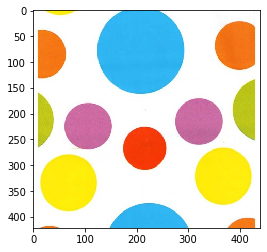

In [26]:
#Leer y plotear la imagen de trabajo
img_rgb = img_read("res/colores.jpg")
plt.imshow(img_rgb)

In [27]:
def espacios_color(img_rgb):
    
    img_R = img_rgb[:,:,0]
    img_G = img_rgb[:,:,1]
    img_B = img_rgb[:,:,2]

    img_lab  = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2LAB)
    img_L = img_lab[:,:,0]
    img_A =  img_lab[:,:,1]
    img_BB = img_lab[:,:,2]
    fig, arreglo_plots = plt.subplots(6,2, figsize=(15, 25))
    colors = ('r','g','b')

    #Espacio de color RGB
    arreglo_plots[0,0].set_title('Canal R')
    arreglo_plots[0,0].imshow(img_R, cmap="gray")
    arreglo_plots[0,1].set_title('Histograma Canal R')
    img_array_i = img_rgb[:,:,0].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=colors[0])

    arreglo_plots[1,0].set_title('Canal G')
    arreglo_plots[1,0].imshow(img_G, cmap="gray")
    arreglo_plots[1,1].set_title('Histograma Canal G')
    img_array_i = img_rgb[:,:,1].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=colors[1])

    arreglo_plots[2,0].set_title('Canal B')
    arreglo_plots[2,0].imshow(img_B, cmap="gray")
    arreglo_plots[2,1].set_title('Histograma Canal B')
    img_array_i = img_rgb[:,:,2].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=colors[2])

    #Espacio de color LAB
    arreglo_plots[3,0].set_title('Canal L')
    arreglo_plots[3,0].imshow(img_L, cmap="gray")
    arreglo_plots[3,1].set_title('Histograma Canal L')
    img_array_i = img_lab[:,:,0].ravel()
    arreglo_plots[3,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=colors[0])

    arreglo_plots[4,0].set_title('Canal A')
    arreglo_plots[4,0].imshow(img_A, cmap="gray")
    arreglo_plots[4,1].set_title('Histograma Canal A')
    img_array_i = img_lab[:,:,1].ravel()
    arreglo_plots[4,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=colors[1])

    arreglo_plots[5,0].set_title('Canal B')
    arreglo_plots[5,0].imshow(img_BB, cmap="gray")
    arreglo_plots[5,1].set_title('Histograma Canal B*')
    img_array_i = img_lab[:,:,2].ravel()
    arreglo_plots[5,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=colors[2]);

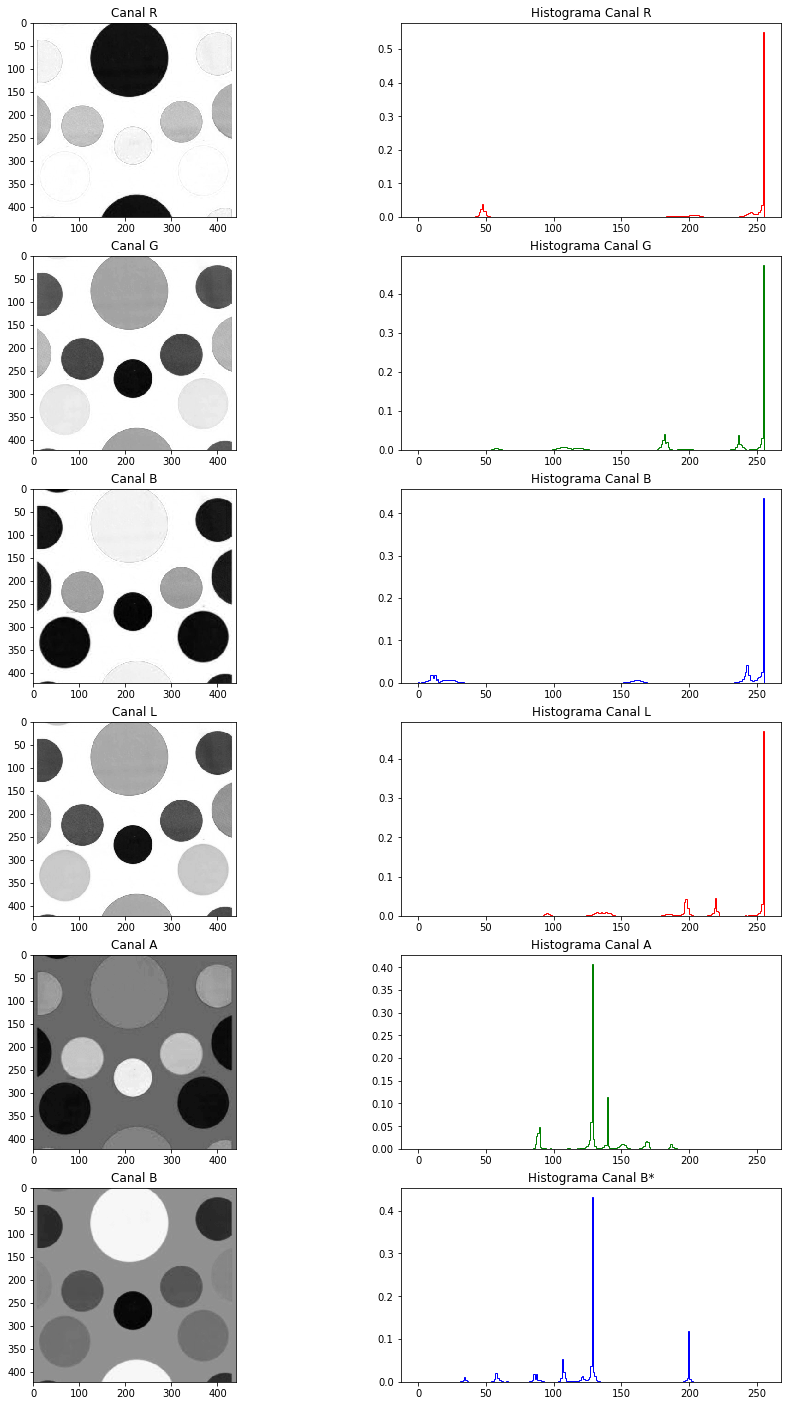

In [28]:
espacios_color(img_rgb)

## Recordemos.

### ¿Si quisieramos separar las pelotas amarillas de la imagen, qué canal podríamos utilizar?

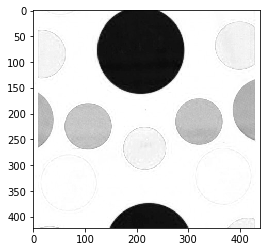

In [19]:
#Leer y plotear la imagen de trabajo
plt.imshow(img_R, cmap = "gray")

### Así mismo, ¿Hay algún contenido de rojo en los circulos cyan?

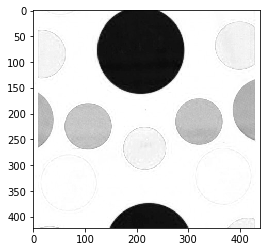

In [20]:
plt.imshow(img_R, cmap = "gray")

### Como ejercicio rápido, probemos el canal HSV y comentemos el resultado.

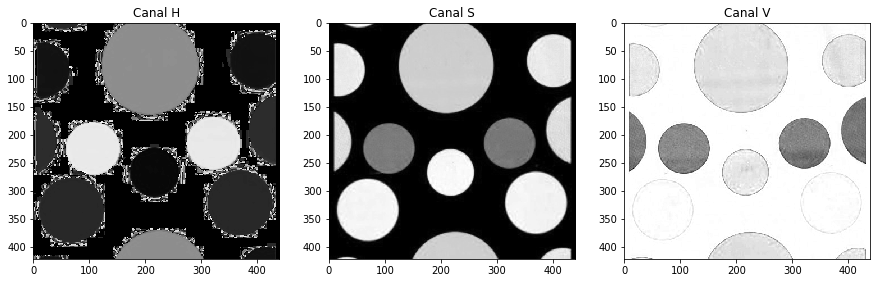

In [21]:
hsv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)

h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

#Crear una figura 1x3 para mostrar las imágenes de entrada y la combinación ponderada
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(h,cmap='gray')
plt.title("Canal H")

plt.subplot(1,3,2)
plt.imshow(s,cmap='gray')
plt.title("Canal S")

plt.subplot(1,3,3)
plt.imshow(v,cmap='gray')
plt.title("Canal V");

### ¿Sería fácil aplicar una segmentación de tipo threshold sobre el canal B para separar  el circulo azul de los demás? ¿Por qué?

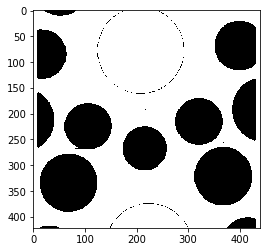

In [22]:
ret,thresh2 = cv2.threshold(img_B,220,255,cv2.THRESH_BINARY)
plt.imshow(thresh2, cmap = "gray")

### Ejercicio 1 en clase (10min) 

### Leer la imagen que se encuentra en res/manzanas.jpeg

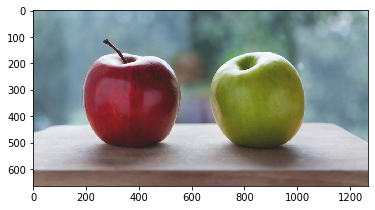

In [29]:
#Leer y plotear la imagen de trabajo
img_man = img_read("res/manzanas.jpeg")
plt.imshow(img_man)

### ¿Si quisieramos separar las manzanas rojas de las verdes qué canal podríamos utilizar?

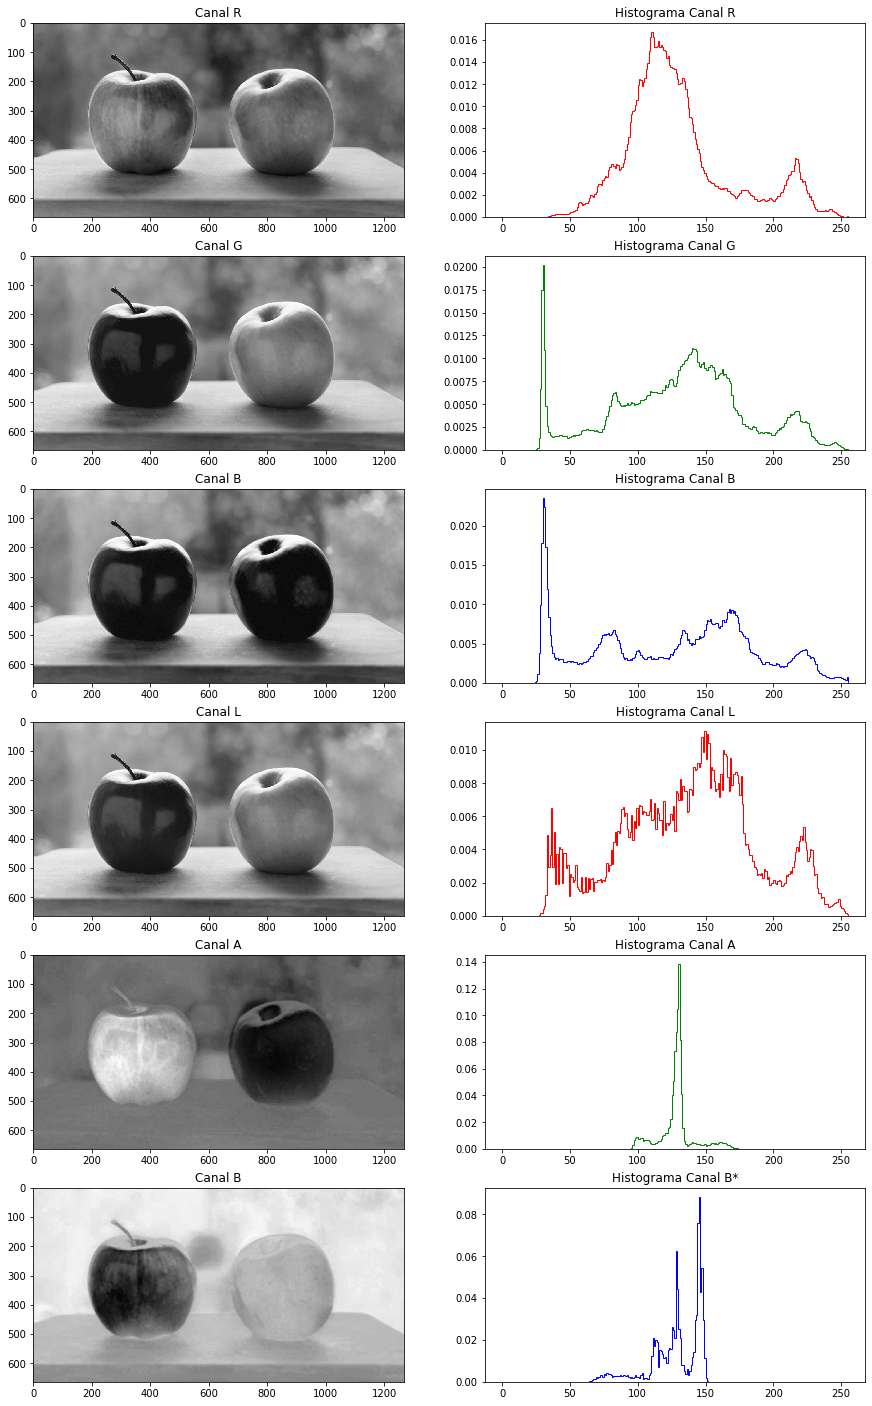

In [30]:
### Escriba su código acá ###
espacios_color(img_man)

### ¿Si quisieramos separar las manzanas verdes de las rojas qué canal podríamos utilizar?

In [ ]:
### Escriba su código acá ###
#Leer y plotear la imagen de trabajo
plt.imshow(img_R, cmap = "gray")

### Ejercicio 2 en clase (10min)

### Leer la imagen que se encuentra en res/omg.jpg

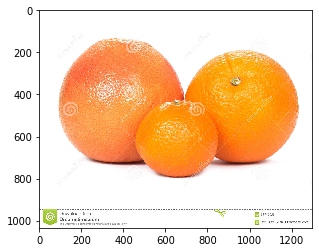

In [33]:
### Escriba su código acá ###
#Leer y plotear la imagen de trabajo
img_nar = img_read("res/omg.jpg")
plt.imshow(img_nar)

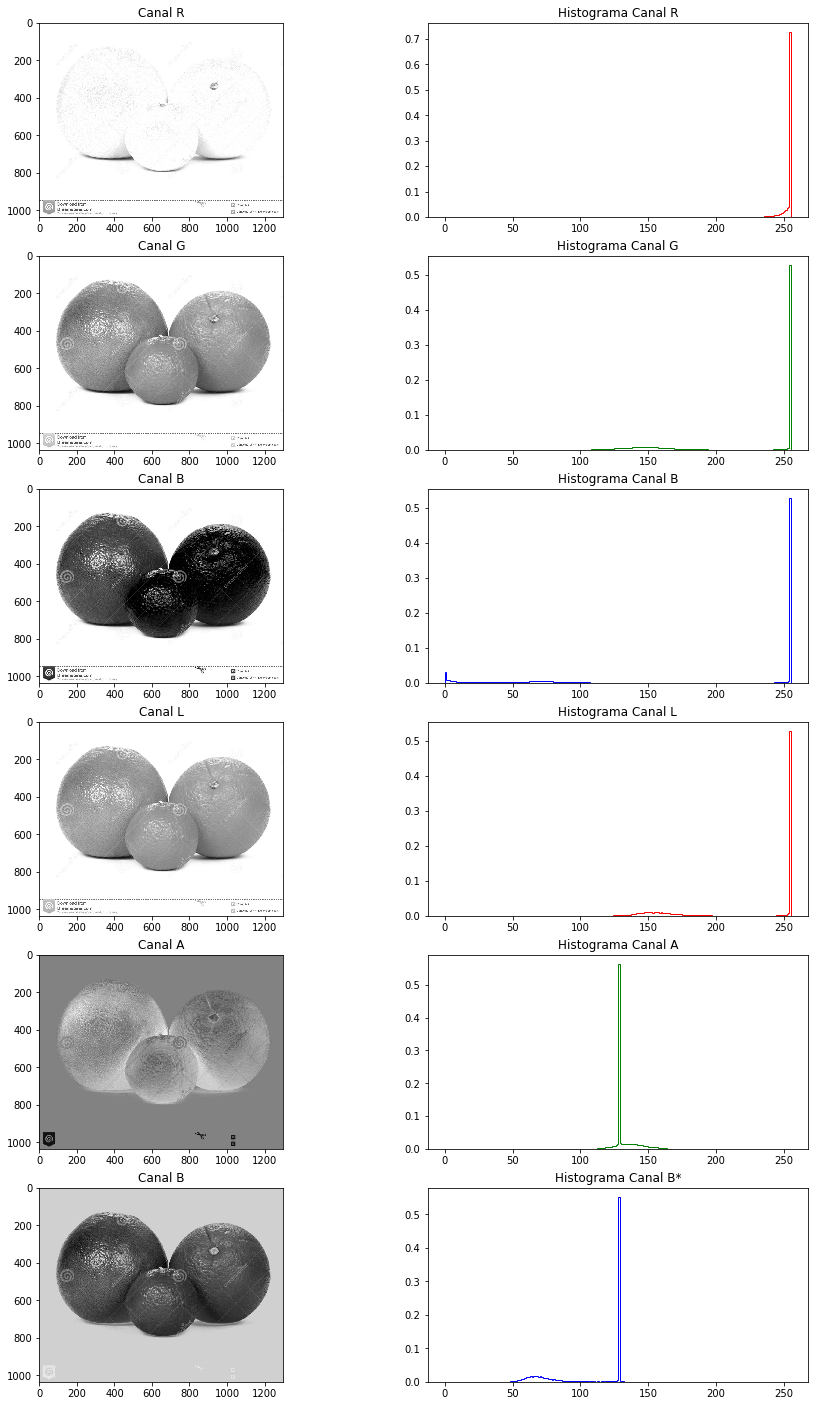

In [34]:
espacios_color(img_nar)

### ¿Es posible separar la naranja de la mandarina? En caso que SÍ, ¿Qué canal podríamos utilizar? En caso que NO justifique...

In [ ]:
### Escriba su código acá ###

Justificación:

### ¿Es posible separar la naranja y la mandarina del pomelo? En caso que SÍ, ¿Qué canal podríamos utilizar? En caso que NO justifique...

In [ ]:
### Escriba su código acá ###

Justificación:

---

Por otro lado, hemos recorrido las transformaciones lineales y no-lineales sobre las imágenes.

## Suma ponderada.

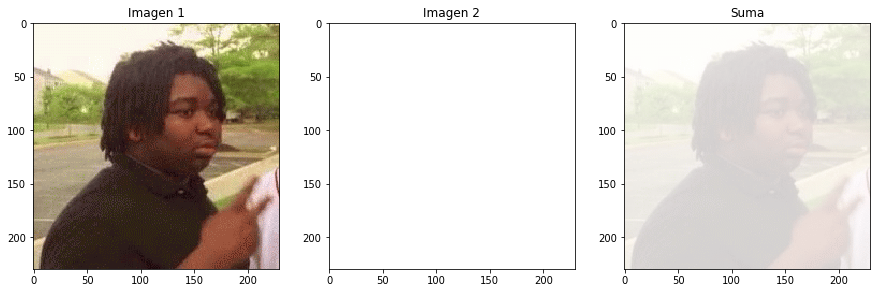

In [38]:
#Leer las imágenes, hacerlas del mismo tamaño para poderlas sumar
img1 = cv2.cvtColor(cv2.imread('res/meme.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/transparent.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

#Indicamos el parámetro a que indica la importancia de cada imagen
a = 0.2

#Mediante la T.Lineal, si a=1, tenemos la imagen 1 únicamente. Si a=0, obtenemos solo img2.
# Si 0<a<1 tendremos combinaciones ponderadas de las imágenes entrada
res = cv2.add(img1*a,img2*(1-a)).astype(np.uint8)

#Crear una figura 1x3 para mostrar las imágenes de entrada y la combinación ponderada
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Suma");

# Resaltar bordes

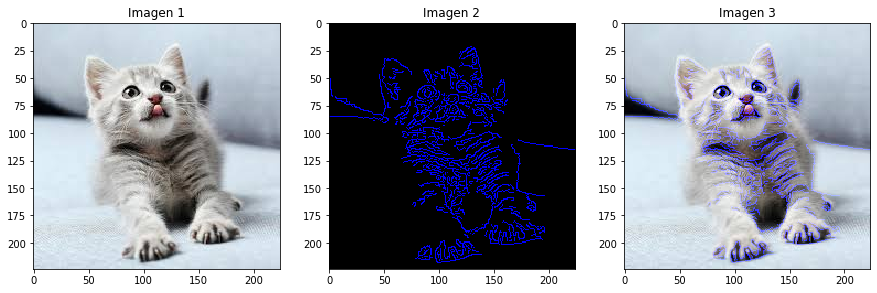

In [39]:
#Leer la imagen de entrada
img1 =cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)

#Utilizamos la función cv2.Canny, que corresponde a un algoritmo de detección de bordes
edges = cv2.Canny(img1,100,200)
#Resaltar los bordes de blanco si sus pixeles son menores que un valor umbral
edges[edges<128] = 0
#Convertir la imagen edges a RGB
edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
edges[:,:,0]=0
edges[:,:,1]=0               #para obtener el color magenta (255,0,255)

#Crear una figura 1x3 para mostrar la imagen de entrada, la imagen obtenida con edges y la superposición
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(edges,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(cv2.add(img1,edges),cmap='gray')
plt.title("Imagen 3");

## ¿Cómo se verían los bordes de color amarillo en la imagen gato2.jpg?

# Resta.

In [ ]:
#Lectura de las dos imágenes
img1 = cv2.cvtColor(cv2.imread('res/correr.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/correr2.png'), cv2.COLOR_BGR2RGB)

#Conversión a tipo de dato uint16
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)

#Suma 125 unidades a img1, hace la resta de imágenes y los extraemos de nuevo
img1 += 125
res = img1 - img2
img1 -= 125

#Regresa al tipo de dato uint8 entre 0 y 255
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)
res=res.astype(np.uint8)

#Genera una figura 1x3 para mostrar la imagen, una estimacion de fondo y la resta
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen tras el movimiento")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta");

## Analicemos.

## Comparemos la imagen "res/correr.png" y "res/correr3.png".

# Multiplicación.

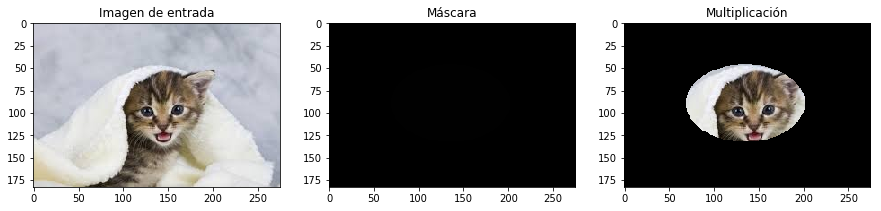

In [7]:
#Leer la imagen
img = cv2.cvtColor(cv2.imread('res/gato2.jpg'), cv2.COLOR_BGR2RGB)

#Leer la máscara y normalizarla, cambiar su tipo de dato y ajustar su tamaño
mascara = cv2.imread('res/mascara.png')/255
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0])).astype(np.uint8)

#Operación multiplicar
out = cv2.multiply(img, mascara)

#Figura 1x3 para mostrar imagen de entrada, máscara y la multiplicación
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Multiplicación')
ax1.imshow(img, cmap='gray')
ax2.imshow(mascara, cmap='gray', vmin = 0, vmax = 1)
ax3.imshow(out, cmap='gray')

In [ ]:
print(np.max(mascara))

# División.

A continuación comparemos el resultado entre las imágenes "res/correr.png" y "res/correr2.png", obtenido por resta y por división.

In [ ]:
#Lectura de imágenes de entrada, se ponen del mismo tamaño para poder operarlas
img1 = cv2.cvtColor(cv2.imread('res/correr.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/correr2.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))


#RESTA
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)
img1 += 125
res = img1 - img2
res = res.astype(np.uint8)
img1 -= 125
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)

#DIVISION

#Es importante convertir los datos a flotante si se dispone a dividir
img1_div = img1.astype(np.float32)
img2_div = img2.astype(np.float32)
div = cv2.divide(img1_div,img2_div)
div = div * 100
div = div.astype(np.uint8)

#Crear figura 2x2 para mostrar las imágenes de entrada con sus operaciones respectivas
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(2,2,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(2,2,3)
plt.imshow(res,cmap='gray')
plt.title("Resta")

plt.subplot(2,2,4)
plt.imshow(div,cmap='gray')
plt.title("División")

### Ejercicio 3 en clase (5min)

Tenemos las siguientes imagenes, en las siguientes direcciones "res/1.png", "res/2.png" y "res/3.png":

<img src="res/imagenes.png"/>

In [ ]:
### Escriba su código acá ###

### Salida esperada:

<img src= "res/resultado.png">

# Transformaciones Logicas.

Text(0.5,1,'Imagen del globo binarizada')

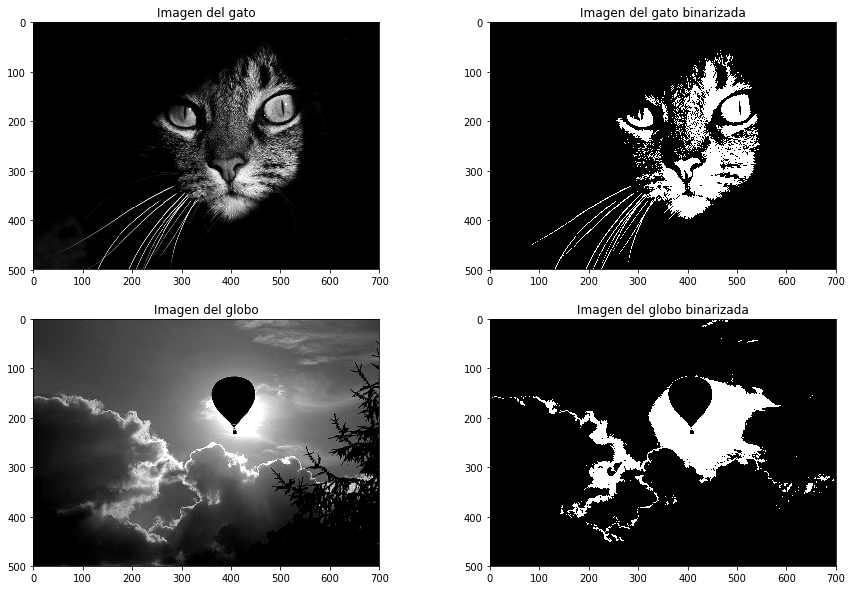

In [6]:
#Se leen las dos imágenes, la entrada I1 y la máscara I2
I1= img_read("res/bool/gato.jpg", "gray")
I2= img_read("res/bool/globo.jpg", "gray")


#Se realiza una umbralización(conversión de la imagen a dos valores, 0 y 255)
Umbral1,I1BN=cv2.threshold(I1,72,255, cv2.THRESH_BINARY)
Umbral2,I2BN=cv2.threshold(I2,148,255, cv2.THRESH_BINARY)

#Crear figura 2x2 para mostrar las imágenes de entrada con sus operaciones respectivas
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(I1,cmap='gray')
plt.title("Imagen del gato")

plt.subplot(2,2,2)
plt.imshow(I1BN,cmap='gray')
plt.title("Imagen del gato binarizada")

plt.subplot(2,2,3)
plt.imshow(I2,cmap='gray')
plt.title("Imagen del globo")

plt.subplot(2,2,4)
plt.imshow(I2BN,cmap='gray')
plt.title("Imagen del globo binarizada")


# Operadores AND, OR, XOR y NOT

Text(0.5,1,'Operador NOT')

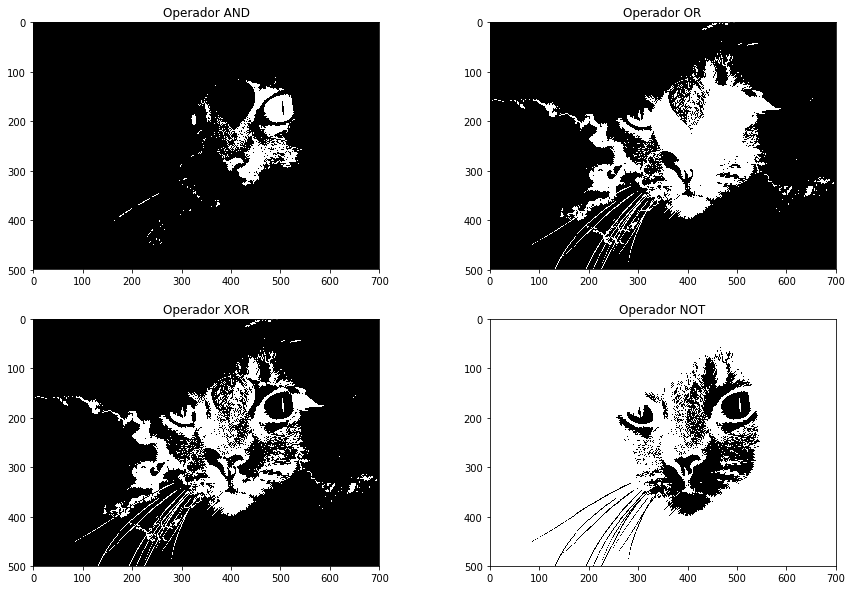

In [5]:
#R1, corresponde a la operación AND aplicada sobre I1BN e I2BN, análogo al out.
R1 = cv2.bitwise_and(I1BN,I2BN)

#R2, corresponde a la operación OR aplicada sobre I1BN e I2BN.
R2 = cv2.bitwise_or(I1BN,I2BN)

#R3, corresponde a la operación XOR aplicada sobre I1BN e I2BN.
R3 =cv2.bitwise_xor(I1BN,I2BN)

#R4, corresponde a la operación NOT aplicada sobre I1BN e I2BN.
R4 =cv2.bitwise_not(I1BN)

#Crear figura 2x2 para mostrar las imágenes de entrada con sus operaciones respectivas
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(R1,cmap='gray')
plt.title("Operador AND")

plt.subplot(2,2,2)
plt.imshow(R2,cmap='gray')
plt.title("Operador OR")

plt.subplot(2,2,3)
plt.imshow(R3,cmap='gray')
plt.title("Operador XOR")

plt.subplot(2,2,4)
plt.imshow(R4,cmap='gray')
plt.title("Operador NOT")

### Ejercicio 4 en clase (10min)

Tenemos las siguientes figuras:

<img src= "res/figuras.png">

In [ ]:
### Escriba su código acá ###
cuadrado = img_read("res/cuadrado.jpg", "gray")
circulo = img_read("res/circulo.jpg", "gray")

resultado = None

plt.imshow(resultado, cmap="gray")

### Salida esperada:

<img src= "res/logico.jpg">

# Traslación.

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen en escala de grises
img =cv2.imread('res/gato.jpg',cv2.IMREAD_GRAYSCALE)
#Se obtienen los vectores filas, columnas
filas,columnas = img.shape
#Se asignan valores a tx y ty, se construye la matriz M de translación
tx = 15
ty = 15
matriz_afin = np.float32([[1,0,tx],
                          [0,1,ty]])

#Transformación de la imagen con base en la matriz M, usando warpAffine
res = cv2.warpAffine(img,matriz_afin,(columnas,filas))# , flags=cv2.INTER_CUBIC)

#Figura 1x2 para mostrar la entrada y la salida
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida")


# Rotación.

Es posible rotar la imagen cierta cantidad de grados utilizando las matrices correctas.

[[  0.8660254    0.5        -27.32849302]
 [ -0.5          0.8660254   81.00867555]]


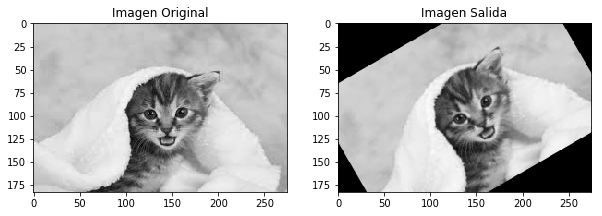

In [3]:
#Lectura de la imagen de entrada
img =cv2.imread('res/gato2.jpg',cv2.IMREAD_GRAYSCALE)
#Obtener los datos de filas y columnas de la imagen
filas,columnas = img.shape

#Asignar un ángulo de rotación
theta = 30

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
#Mostrar la matriz calculada
print(matriz_afin_rot)

#Aplicar la matriz obtenida sobre la imagen leída
rot = cv2.warpAffine(img,matriz_afin_rot,(columnas,filas))

#Figura 1x2 para mostrar imagen original y resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(rot,cmap='gray')
plt.title("Imagen Salida");

# Inclinación.

In [ ]:
#Lectura de imagen de entrada y obtención de filas y columnas
img =cv2.imread('res/gato.jpg',cv2.IMREAD_GRAYSCALE)
filas,columnas = img.shape

#Con base en la teoría, crear la matriz M de inclinación
#reemplazando los valores b y d
inc_x = 0.0
inc_y = 0.5
matriz_afin = np.float32([[1,inc_x,0],
                          [inc_y,1,0]])

#Aplicar la matriz generada a la imagen leída
res = cv2.warpAffine(img,matriz_afin,(columnas,filas))

#Generar la figura 1x2 y mostrar entrada vs resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida")

# Interpolación.

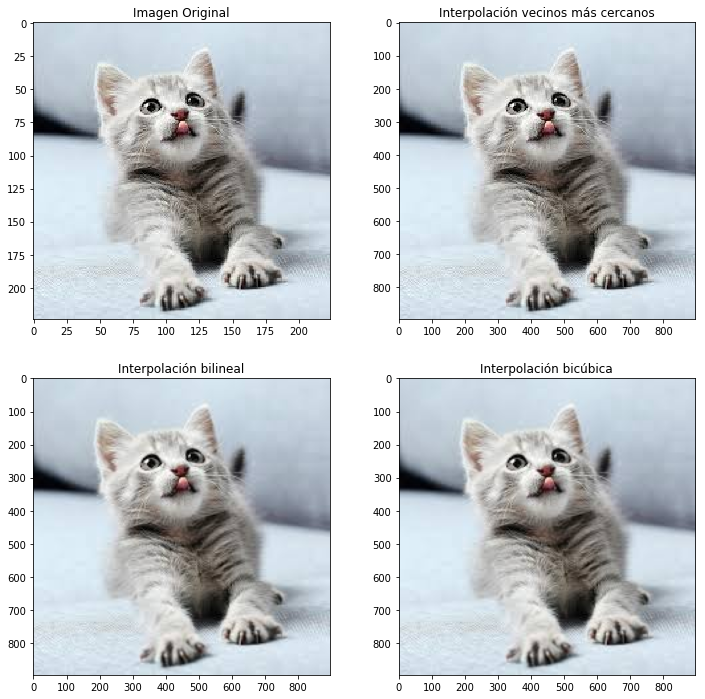

In [7]:
#Leer la imagen de entrada a color y convertirla RGB
img=cv2.imread('res/gato.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Acercar la imagen de entrada con base en una aproximación de vecinos cercanos
#o interpolación bilinear/bicúbica
nearest = cv2.resize(img,(img.shape[1]*4, img.shape[0]*4), interpolation = cv2.INTER_NEAREST)
bilinear = cv2.resize(img,None,fx=4, fy=4, interpolation = cv2.INTER_LINEAR)
bicubic = cv2.resize(img,None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)

#Generar figura 2x2 para mostrar y contrastar las aproximaciones con la imagen original
fig = plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(nearest,cmap='gray')
plt.title("Interpolación vecinos más cercanos")

plt.subplot(2,2,3)
plt.imshow(bilinear,cmap='gray')
plt.title("Interpolación bilineal")

plt.subplot(2,2,4)
plt.imshow(bilinear,cmap='gray')
plt.title("Interpolación bicúbica")

#Guardar las imágenes en la carpeta del notebook
nearest = cv2.cvtColor(nearest, cv2.COLOR_BGR2RGB)
bilinear = cv2.cvtColor(bilinear, cv2.COLOR_BGR2RGB)
bicubic = cv2.cvtColor(bicubic, cv2.COLOR_BGR2RGB)


cv2.imwrite("nearest.jpg", nearest);
cv2.imwrite("bilinear.jpg", bilinear);
cv2.imwrite("bicubic.jpg", bicubic);

# Rápidamente, recordemos suma, resta, multiplicación y división sobre el histograma. Y algún caso especial de éstas transformaciones.

# Suma

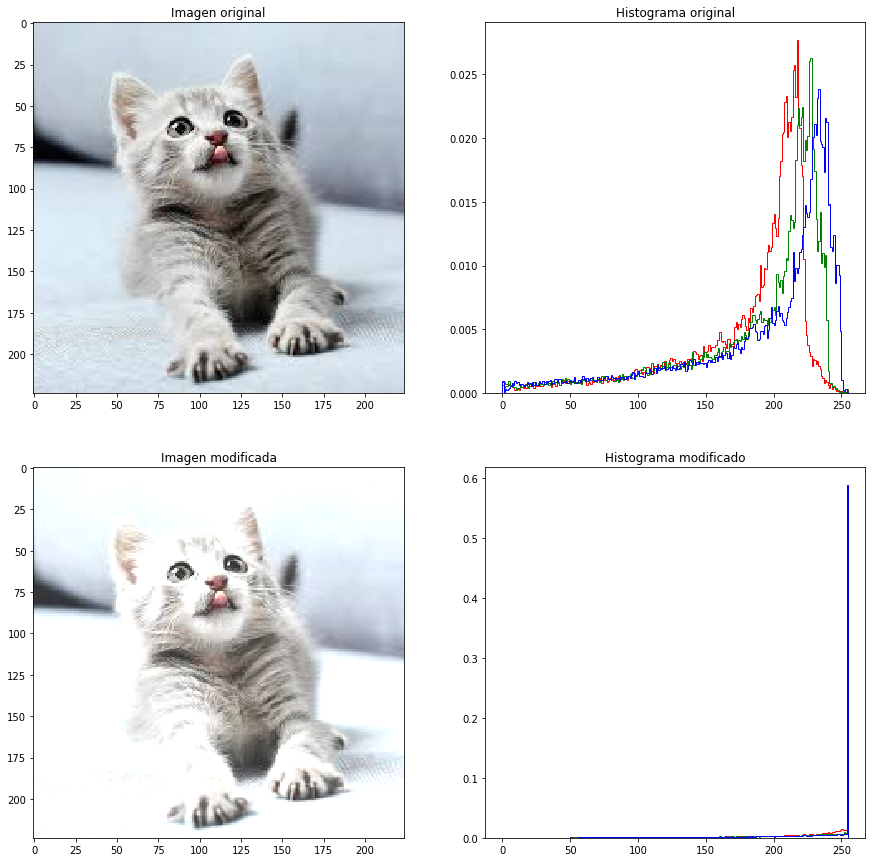

In [8]:
#Se realiza la lectura de la imagen
img = cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)
#img_add es una matriz de ceros del mismo tamaño de la imagen original, corresponde a una copia para editar.
#el tipo de dato debe ser uint8 para estar entre 0 y 255
img_add = np.zeros(img.shape, np.uint8)

#A cada uno de los canales de img se le suman q,w,e unidades. 
q = 50 ; w = 50; e = 50
#Se sustituyen los valores de cada canal de la copia por los valores modificados de la imagen original
img_add[:,:,0] = cv2.add(img[:,:,0], q)
img_add[:,:,1] = cv2.add(img[:,:,1], w)
img_add[:,:,2] = cv2.add(img[:,:,2], e)

#Se realiza el arreglo de 2x2 para mostrar imagen e imagen modificada vs histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(img_add, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = img_add[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

# Resta

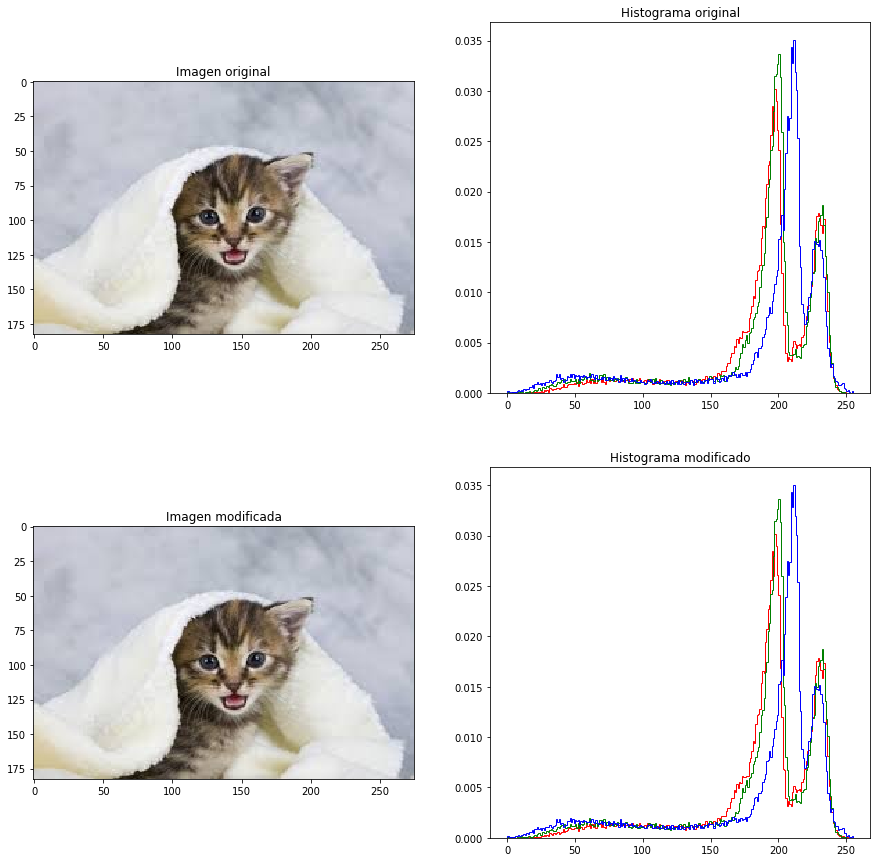

In [9]:
#Se lee la imagen 
img = cv2.cvtColor(cv2.imread('res/gato2.jpg'), cv2.COLOR_BGR2RGB)
#Se crea la imagen copia para editarla
img_subtract = np.zeros(img.shape, np.uint8)
#Se restan q,w,e unidades a los canales de img.
#Se sustituyen los valores de cada canal de la copia por los valores modificados de la imagen original
q = 0; w = 0; e = 0
img_subtract[:,:,0] = cv2.subtract(img[:,:,0], q)
img_subtract[:,:,1] = cv2.subtract(img[:,:,1], w)
img_subtract[:,:,2] = cv2.subtract(img[:,:,2], e)

#Se realiza el arreglo de 2x2 para mostrar imagen e imagen modificada vs histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(img_subtract, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = img_subtract[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

## Analicemos.
## ¿Qué modifican los valores de las variables q,w,e? ¿Qué ocurre si al modificarlos, en suma y resta, q>>w & q >>e

# Multiplicación/División

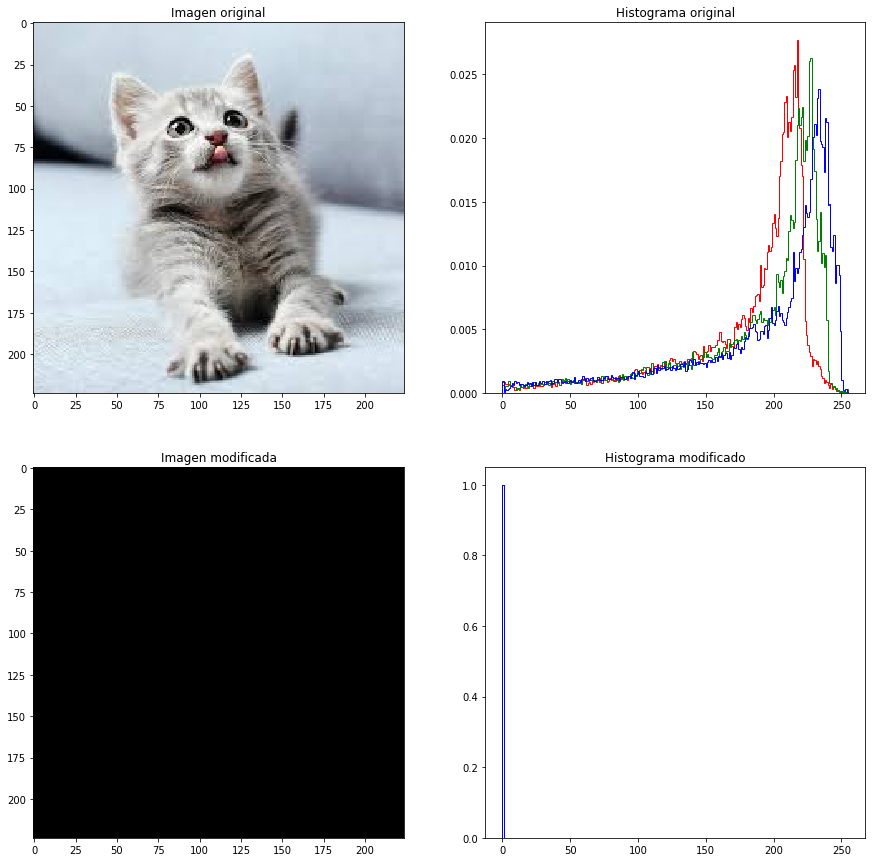

In [10]:
#Se lee la imagen
img = cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)
#Se crea la imagen copia
img_mult = np.zeros(img.shape, np.uint8)

#Se multiplican los valores de cada canal de img por q,w,e unidades
#Se sustituyen los valores de cada canal de la copia por los valores modificados de la imagen original
r = 2; g = 2; b = 2
img_mult[:,:,0] = cv2.multiply(img[:,:,0], q)
img_mult[:,:,1] = cv2.multiply(img[:,:,1], w)
img_mult[:,:,2] = cv2.multiply(img[:,:,2], e)

#Se realiza el arreglo de 2x2 para mostrar imagen e imagen modificada vs histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(img_mult, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = img_mult[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

## Analicemos.
## Modifique el código anterior y obtenga la operación división. De nuevo, varíe de forma antisimétrica los valores de q,w,e.

# La transformación Gamma.

La corrección Gamma tienes su raíces en la forma en que los humanos percibimos la luz y el color. Esta percepción es de tipo no lineal y en condiciones de iluminación normal sigue un comportamiento de potencia.

Gamma puede adquirir valores 0 < gamma < 1 y aparentar una raíz. Así mismo, puede ser gamma > 1 y actuar como una potencia.

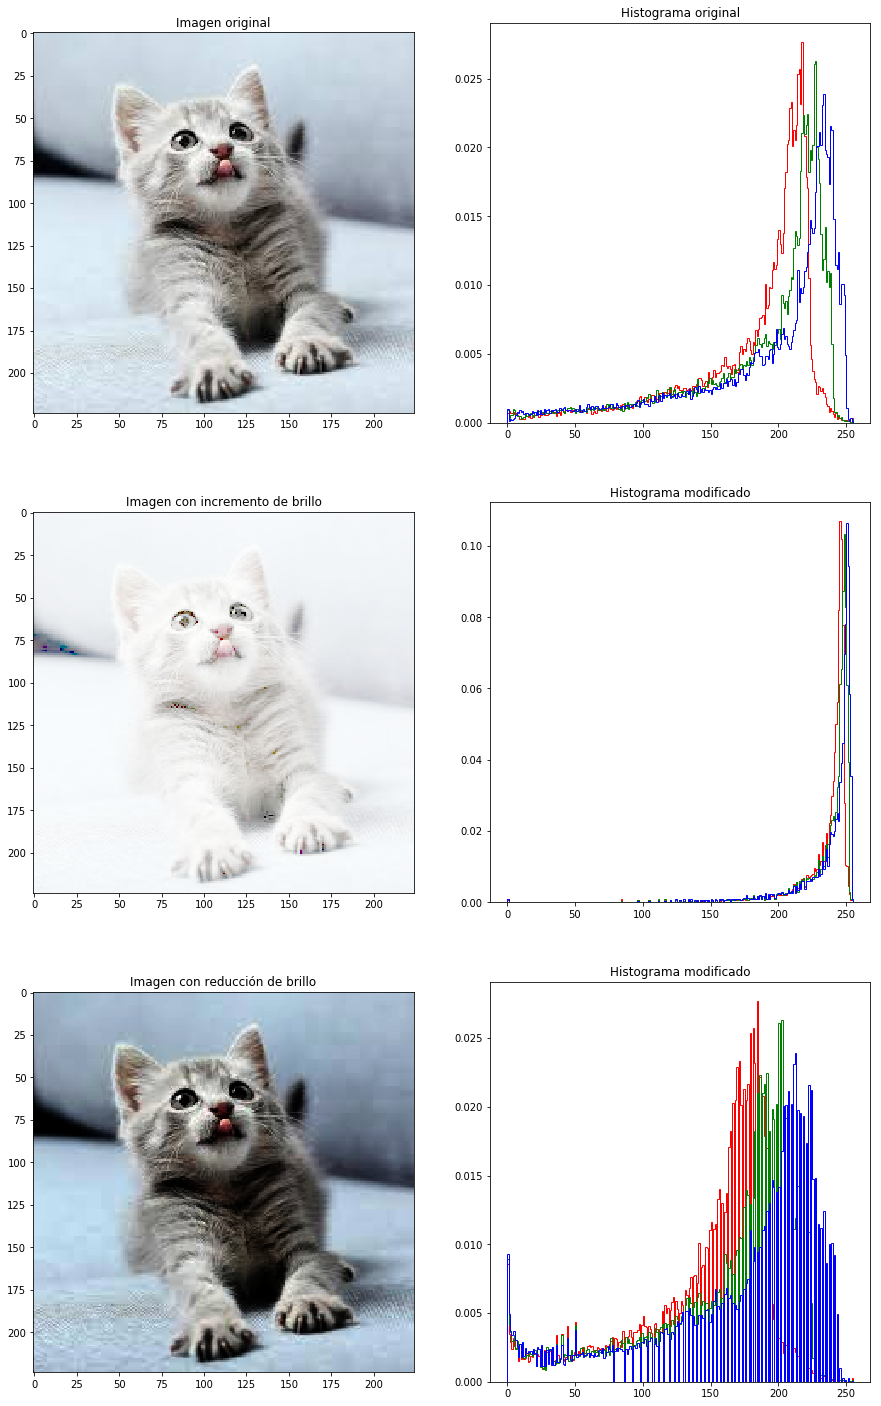

In [11]:
#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,gamma (args)
a = 1
gamma = 0.2

#Aplicar la transformación corrección gamma sobre la imagen de entrada
res_brillante = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1
gamma = 2

res_oscuro = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 25))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen con incremento de brillo')
arreglo_plots[1,0].imshow(res_brillante, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_brillante[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])
    
arreglo_plots[2,0].set_title('Imagen con reducción de brillo')
arreglo_plots[2,0].imshow(res_oscuro, cmap="gray")
arreglo_plots[2,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_oscuro[:,:,i].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

# Ecualización del histograma.

<Figure size 432x288 with 0 Axes>

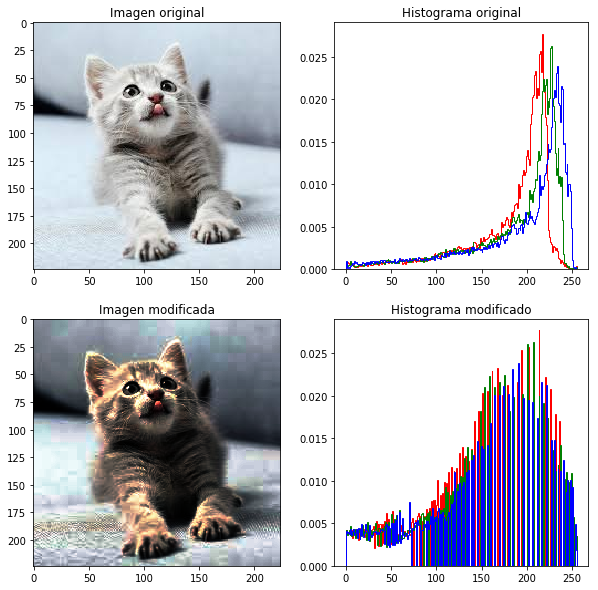

In [12]:
#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization(img):
     
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), density=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        res[img == g] = (gmax - gmin)*cdf[g] + gmin
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta    
img = cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)
res = apply_f_on_rgb(img, histogram_equalization, [])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,2, figsize=(10, 10))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])
    
arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i], cumulative = False)


# Expansión (normalización) del histograma.


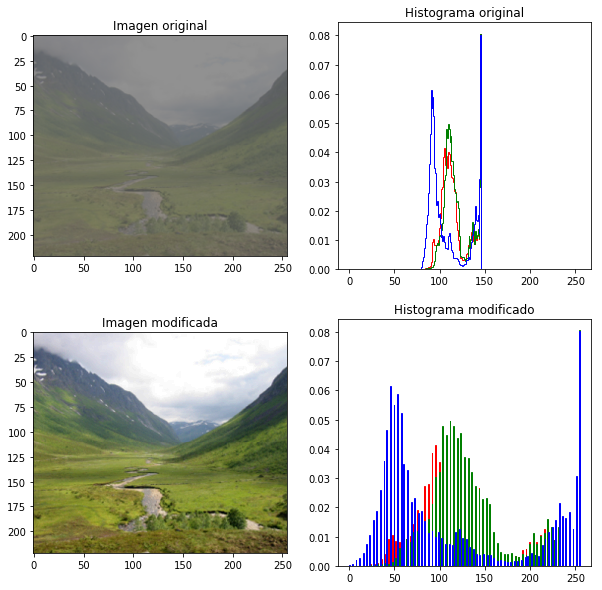

In [13]:
#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función expansión del histograma cuyo parámetro es una imagen
def histogram_expansion(img):
    
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros([img.shape[0], img.shape[1]], dtype=np.float32)
    
    #Extraer el mínimo y el máximo del conjunto de datos
    m = float(np.min(img))
    M = float(np.max(img))
    #Aplicar la función de expansión(normalización) y asegurar datos uint8
    res = (img-m)*255.0/(M-m)
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/valle.png'), cv2.COLOR_BGR2RGB)

#Aplicar la transformación expansión de histograma sobre la imagen de entrada
res = apply_f_on_rgb(img, histogram_expansion, [])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(10, 10))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

### Ejercicio 5 en clase (10min)

<img src= "res/ejercicio_5.png">


In [ ]:
### Escriba su código acá ###

clase = img_read("res/clase.png")

plt.imshow(clase)

### Ejercicio 6 en clase (5min)

### Salida esperada:

<img src= "res/answer_2.png">

In [ ]:
### Escriba su código acá ###

dog = img_read("res/perro.png")

plt.imshow(dog)

# Resumen histograma.

In [ ]:
#Leer las imágenes 1 a la 4 en RGB
img1 = img_read('res/low_light.png')
img2 = img_read('res/hi_light.png')
img3 = img_read('res/low_contrast.png')
img4 = img_read('res/hi_contrast.png')

#_ = es una forma de eliminar el verbose de matplotlib

#Se genera un arreglo para imprimir las imágenes, 4x2, 4 imágenes y 4 histogramas asociados.
fig, arreglo_plots = plt.subplots(4,2, figsize=(10, 15))
#Título del cuadro en la posición (0,0)
arreglo_plots[0,0].set_title('Imagen baja iluminación')
#Imprimir la imagen 1 en la posición (0.0) del arreglo
arreglo_plots[0,0].imshow(img1)
#Título del cuadro en la posición (0,1)
arreglo_plots[0,1].set_title('histograma')
#Imprimir el histograma en la posición (0,1)
_ = arreglo_plots[0,1].hist(img1[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

#Análogamente para los demás casos, como se observa varía la posición asociada en el subplot
arreglo_plots[1,0].set_title('Imagen alta iluminación')
arreglo_plots[1,0].imshow(img2)
arreglo_plots[1,1].set_title('histograma')
_ = arreglo_plots[1,1].hist(img2[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[2,0].set_title('Imagen bajo contraste')
arreglo_plots[2,0].imshow(img3)
arreglo_plots[2,1].set_title('Histograma')
_ = arreglo_plots[2,1].hist(img3[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[3,0].set_title('Imagen alto contraste')
arreglo_plots[3,0].imshow(img4)
arreglo_plots[3,1].set_title('Histograma')
_ = arreglo_plots[3,1].hist(img4[:,:,0].ravel(), bins=256, range=(0.0, 255.0))



# Filtros y la operación convolución.

Utilicemos la función filter2D.

In [ ]:
#Leer la imagen de entrada
img = img_read('res/gato2.jpg', 'color')

#Crear un kernel de tamaño 5
k_size = 5
kernel = np.ones((k_size,k_size),np.float64)/k_size**2

#Aplicar filter2D sobre la imagen y el kernel arbitrario, bajo la alternativa de borde preferida
res = cv2.filter2D(img, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)

#Mostrar la imagen original y la imagen bajo filter2D
fig = plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida")

# Tipos de borde.

Podemos seleccionar el tipo de borde que deseemos en la imagen, haciendo uso de la función de opencv.

In [ ]:
#Leer imagen de entrada
img = img_read('res/gato2.jpg', 'color')

#Asignar un valor al tamaño del borde en las 4 direcciones
#up,down,left,right
b_sz = 5

#Aplicar MakeBorder bajo todas las alternativas (último parámetro)
replicate = cv2.copyMakeBorder(img,b_sz,b_sz,b_sz,b_sz,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,b_sz,b_sz,b_sz,b_sz,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,b_sz,b_sz,b_sz,b_sz,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,b_sz,b_sz,b_sz,b_sz,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img,b_sz,b_sz,b_sz,b_sz,cv2.BORDER_CONSTANT,value=[0,0,0])

#Generar 6 figuras para mostrar cada una de las alternativas y la imagen original
fig = plt.figure(figsize=(12,6))
plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

# Tipos de ruido.

In [ ]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np

#Definir la función ruido gaussiano
def gaussian_noise(img, std):
    #Las variables row, col y ch dependen de la imagen de entrada y sus componentes
    mean = 0
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1       
    #Definir la matriz de ceros noisy  del mismo tamaño que la imagen original
    noisy = np.zeros(img.shape, np.float64)
    #Generar una distribución normal a partir del comando de numpy
    gauss = np.random.normal(mean,std,(row,col,ch)) if ch > 1 else np.random.normal(mean,std,(row,col))
    gauss = gauss.reshape(row,col,ch)               if ch > 1 else gauss.reshape(row,col)
    #La imagen con ruido gaussiano es la suma de la imagen de entrada con la procesada
    noisy =  img + gauss
    #Ajustar los datos para que estén entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy

#Definir la función de ruido impulsivo
def sp_noise(img, s_vs_p, amount):
    
    #Obtener los valores de row, col y ch con base en la imagen de entrada
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1  
    
    #Crear una copia de la imagen para volverla ruidosa
    noisy = img.copy()
    
    # Salt mode
    
    #Multiplica los parámetros con el tamaño de la imagen, los redondea al mínimo entero
    num_salt = np.ceil(amount * img.size * s_vs_p)
    #Genera el vector coordenadas en la imagen de copia usando la función randint de numpy
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in img.shape]

    #La imagen evaluada en el vector coords se satura
    noisy[coords] = 255
    
    # Pepper mode
    
    #Se multiplican los parámetros por el tamaño de la imagen, variando s_vs_p
    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
    #Generar el vector coords utilizando randint
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img.shape]
    #La imagen en el vector coords se satura en color negro
    noisy[coords] = 0
    return noisy

#Definir la función ruido de Poisson
def poisson_noise(img):
    
    #Se aplica el comando de numpy random.poisson a la imagen de entrada
    noisy = np.random.poisson(img) 
    #Los valores deben estar entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy



img = cv2.cvtColor(cv2.imread('res/nieve.jpg'), cv2.COLOR_BGR2RGB)

#Aplicar ruido de Poisson a la imagen y volver al tipo de dato uint8
pos = poisson_noise(img)
pos = pos.astype(np.uint8)

#Dar valores a los parámetros de entrada de la función ruido pimienta
s_vs_p = 0.5
amount = 0.05

#Aplicar ruido gaussiano y darle tipo de dato uint8
std = 50
res = gaussian_noise(img, std)
res = res.astype(np.uint8)
pim = sp_noise(img, s_vs_p, amount)
pim = pim.astype(np.uint8)

#Generar un subplot 1x2 para mostrar la imagen original y la imagen con ruido gaussiano
fig, arreglo_plots = plt.subplots(2,2, figsize=(20, 15))

arreglo_plots[0][0].set_title('Imagen original')
arreglo_plots[0][0].imshow(img, cmap="gray")

arreglo_plots[1][0].set_title('Imagen con ruido gaussiano')
arreglo_plots[1][0].imshow(res, cmap="gray")

arreglo_plots[0][1].set_title('Imagen con ruido pimienta')
arreglo_plots[0][1].imshow(pim, cmap="gray")

arreglo_plots[1][1].set_title('Imagen con ruido poisson')
arreglo_plots[1][1].imshow(pos, cmap="gray")

# Filtro de media

In [ ]:
#Leer la imagen de entrada
img = img_read('res/gato.jpg', 'color')

#Dar valor al tamaño del kernel
k_size = 3

#Aplicar suavizado mediante la función blur, con  un tipo de borde que puede cambiarse
res1 = cv2.blur(img,(k_size,k_size),borderType=cv2.BORDER_REPLICATE )

#Aplicar el suavizado mediante filter2D
kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)
res2 = cv2.filter2D(img, ddepth= -1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)

#Generar un subplot de 1x3 para mostrar imagen original, Blur y Filter2D
fig = plt.figure(figsize=(20,24))

plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,3,2)
plt.imshow(res1,cmap='gray')
plt.title("Función Blur")

plt.subplot(1,3,3)
plt.imshow(res2,cmap='gray')
plt.title("Función Filter2D")

# Filtro de mediana, su aplicación.

In [ ]:
#Leer la imagen de entrada en escala de grises
img = img_read('res/nieve.jpg', 'color')
#Aplicar ruido sal y pimienta
img = sp_noise(img, s_vs_p = 0.5, amount = 0.5)

#Definir tamaño del kernel
k_size = 5
#Aplicar filtro de mediana a la imagen de entrada
res= cv2.medianBlur(img, k_size)

#Generar un subplot 1x2 para mostrar imagen original e imagen tras filtro de mediana
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))
arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray")

arreglo_plots[1].set_title('Imagen tras filtro de mediana')
arreglo_plots[1].imshow(res, cmap="gray")

# Filtro de máximo y mínimo.

In [ ]:
#Definir función de Filtro del Máximo
def maximum_filter(img,k_size):
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Radio del kernel
    r = math.floor(k_size/2)
    #Recorrer cada posición i,j de la imagen con el kernel
    for i in range(r, img.shape[0]-r):
        for j in range(r, img.shape[1]-r):
            #Tamaño de la ventana 
            window = img[i-r:i+r+1,j-r:j+r+1]
            #Cambiar el valor de la posición i,j de la imagen por el de la ventana
            max_val = np.max(window)
            res[i,j] = max_val
    return res

#Leer imagen de entrada
img = img_read('res/nieve.jpg', 'color')

#Aplicar ruido sal y pimienta a la imagen
img = sp_noise(img, s_vs_p = 0, amount = 0.04)
#Definir tamaño del kernel
k_size = 3 

#Aplicar filtro del Máximo a la imagen
res = maximum_filter(img, k_size)
#Recordar el tipo de dato uint8, entre 0 y 255
res = res.astype(np.uint8)

#Generar un subplot 1x2 que muestre imagen original e imagen tras filtro de máximo
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen tras filtro de máximo')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

In [ ]:
#Definir función filtro del mínimo
def minimum_filter(img,k_size):
    #Crear matriz de ceros del tamaño de imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Definir el radio del kernel
    r = math.floor(k_size/2)
    #Recorrer cada posición i,j de la imagen con el kernel
    for i in range(r, img.shape[0]-r):
        for j in range(r, img.shape[1]-r):
            #Tamaño de la ventana 
            window = img[i-r:i+r+1,j-r:j+r+1]
            #Cambiar el valor de la posición i,j de la imagen por el de la ventana
            min_val = np.min(window)
            res[i,j] = min_val
    return res

#Leer la imagen de entrada y aplicarle ruido sal y pimienta
img = img_read('res/nieve.jpg', 'color')
img = sp_noise(img, s_vs_p = 1, amount = 0.04)
#Definir el radio del kernel
k_size = 3

#Aplicar filtro del mínimo a la imagen de entrada
res = minimum_filter(img, k_size)

#Tipo de dato entero, entre 0 y 255
res = res.astype(np.uint8)

#Generar subplot 1x2 para mostrar imagen original e imagen tras filtro del mínimo
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen tras filtro de mínimo')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

--------------

# Ejercicio 7 en clase (5min)

In [ ]:
img = img_read('res/nieve.jpg', 'color')

img = sp_noise(img, s_vs_p = 0.5, amount = 0.5)

### Modificar acá (Aproximadamente 1-3 líneas ) ###
k_size = 3
res = cv2.medianBlur(img, k_size)
### Fin de la modificación ###




fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))
arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray")

arreglo_plots[1].set_title('Imagen mejorada')
arreglo_plots[1].imshow(res, cmap="gray")

### Salida esperada:

<img src= "res/answer_5.png">